# DS 3000 HW 4

Due: Friday July 19th @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted files represent your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the files to gradescope.

### Tips for success
- Start early
- Make use of Piazza
- Make use of Office hour
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (not show each other) the problems.

## Part 1: AZ Quotes

### Part 1.1 (15 points)

AZ Quotes is one of the websites to provide multiple quotes and sorted by different ways. A quote usually has a text and an author name. 

<img src="https://i.ibb.co/wht5NB0/Screenshot-from-2022-02-23-05-14-26.png" alt="Drawing" style="width: 600px;"/>

Write a function, `clean_quote()` which scrapes all the quotes from https://www.azquotes.com/quotes/topics/positive.html:

```python
url = 'https://www.azquotes.com/quotes/topics/positive.html'
html = get_url(url)
df_quote = clean_quote(html)
df_quote.head()
```

gives:

|   |          author    |                                              text |
|--:|-------------------:|--------------------------------------------------:|
| 0 | Mahatma Gandhi     | Keep your thoughts positive because your thoug... |
| 1 | Alice Morse Earle  | Every day may not be good... but there's somet... |
| 2 | Nicky Gumbel       | You can't change how people treat you or what ... |
| 3 | Winston Churchill  | The POSITIVE THINKER sees the INVISIBLE, feels... |
| 4 |Paramahansa Yogananda| If you want to be sad, no one in the world can... |

After writing the function, run the above code to verify it works.

Hint: There are 25 quotes after you scrape the page. However, you may get more items when you scrape the quotes. Feel free to select only the 1:26 to get rid of some other items. 

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
from bs4 import BeautifulSoup
import requests
  
def get_url(url):
    """ gets html from url
    
    Args:
        url (str): a url
        
    Returns:
        html (str): the html from the url
    """
    response = requests.get(url)
    return response.text
    

def clean_quote(html):
    """ scrapes quotes from azquote and creates a dataframe with author and text
    
    Args:
        html (str): html text object from brainyquote
        
    Returns:
        clean_df (DataFrame): DataFrame with columns
                                author (str): name of the author
                                text (str): text of the quote
    """
    
    # This parses the HTML content and find all div elements with the class 'wrap-block'
    soup = BeautifulSoup(html, 'html.parser')
    quotes = soup.find_all('div', class_='wrap-block')
    
    # Initializes a list to be used to store the authors and quotes in the link html code
    authors = []
    texts = []

    # This loop iterated through the 25 quotes and finds the text and authors of each of them
    for quote in quotes[:25]:
        text_tag = quote.find('a', class_='title')
        author_tag = quote.find('div', class_='author')
        
        # This checks to make sure there is an author and quote and then it extracts the information 
        if text_tag and author_tag:
            text = text_tag.text.strip()
            author = author_tag.text.strip()
            texts.append(text)
            authors.append(author)

    # Last part creates a dataframe for the authors and quotes and returns it 
    clean_df = pd.DataFrame({'author': authors, 'text': texts})
    return clean_df
    

In [2]:
url = 'https://www.azquotes.com/quotes/topics/positive.html'
html = get_url(url)
df_quote = clean_quote(html)
df_quote.head()

,author,text
0,Mahatma Gandhi,Keep your thoughts positive because your thoug...
1,Alice Morse Earle,Every day may not be good... but there's somet...
2,Winston Churchill,"The POSITIVE THINKER sees the INVISIBLE, feels..."
3,Nicky Gumbel,You can't change how people treat you or what ...
4,Horace,Carpe diem! Rejoice while you are alive; enjoy...


### Part 1.2 (20 points)

Navigate to each quote's own webpage and you'll find more information about the tags for each quotes: https://www.azquotes.com/quote/361010?ref=positive

Store the tags associated with each quote too.  For example, the quote above has tags: `Hope`, `Positive`, `Inspirational`, `Happiness` and a lot of others.  Think carefully about how you store the tags so that one may easily understand how many times each tag (e.g. `Positive`) appears in your dataframe with simple pandas manipulations.

You can update the functions in part 1.1. Run your function in the end and show the head of the data frame. 

In [3]:
# note that there may be multiple classes, tags, id, etc. that  could lead to the correct data frame

def get_quote_tags(html):
    """ grabs the tags from each of the quotes from the html of azquote
    
    Args:
        html (str): html text object from brainyquote
        
    Returns:
        clean_df (DataFrame): DataFrame with columns
                                author (str): name of the author
                                text (str): text of the quote
                                tags (str): string with tags from quote
    
    """
    _ = BeautifulSoup(html, 'html.parser')
    quotes = _.find_all('div', class_='wrap-block')[:25]
    
    authors = []
    texts = []
    tags_list = []
    
    for quote in quotes:
        author_tag = quote.find('div', class_='author')
        text_tag = quote.find('a', class_='title')
        
        author = author_tag.text.strip()
        text = text_tag.text.strip()
        quote_url = 'https://www.azquotes.com' + text_tag.get('href')
            

        quote_html = get_url(quote_url)
        quote_soup = BeautifulSoup(quote_html, 'html.parser')
        tags = [tag.text for tag in quote_soup.find_all('a', class_='tag')]
        tags_str = ', '.join(tags)
            
        authors.append(author)
        texts.append(text)
        tags_list.append(tags_str)
    
    
    clean_df = pd.DataFrame({
        'author': authors,
        'text': texts,
        'tags': tags_list
    })
    return clean_df
    

In [4]:
url = 'https://www.azquotes.com/quotes/topics/positive.html'
html = get_url(url)
if html:
    df_quote = get_quote_tags(html)
    print(df_quote.head())

              author                                               text tags
0     Mahatma Gandhi  Keep your thoughts positive because your thoug...     
1  Alice Morse Earle  Every day may not be good... but there's somet...     
2  Winston Churchill  The POSITIVE THINKER sees the INVISIBLE, feels...     
3       Nicky Gumbel  You can't change how people treat you or what ...     
4             Horace  Carpe diem! Rejoice while you are alive; enjoy...     


## Part 2: Fantasy Football

### Part 2.1 (10 points)

In Fantasy Football, real NFL players gain points for fans at home based on some scoring criteria (which differs based on the website, but in all cases more points is better). Use the following link https://fantasydata.com/nfl/fantasy-football-leaders?scope=season&scoring=fpts_ppr&order_by=fpts_ppr&sort_dir=desc&sp=2023_REG and `pd.read_html` to extract 2023 fantasy football regular season data. Notice that this data has double layers of column names. You can re-name the columns for the easier plotting later. 

In [5]:
import pandas as pd


url = 'https://fantasydata.com/nfl/fantasy-football-leaders?scope=season&scoring=fpts_ppr&order_by=fpts_ppr&sort_dir=desc&sp=2023_REG'

dfs = pd.read_html(url)

df = dfs[0]

print(df.head())


  Unnamed: 0_level_0   Unnamed: 1_level_0 Unnamed: 2_level_0  \
                  RK                 NAME               TEAM   
0                  1          CeeDee Lamb                DAL   
1                  2           Josh Allen                BUF   
2                  3  Christian McCaffrey                 SF   
3                  4          Tyreek Hill                MIA   
4                  5          Jalen Hurts                PHI   

  Unnamed: 3_level_0 Unnamed: 4_level_0 PASSING         RUSHING     RECEIVING  \
                 POS                 GP     YDS  TD INT     YDS  TD       REC   
0                 WR                 17       0   0   0     113   2       135   
1                 QB                 17    4306  29  18     524  15         0   
2                 RB                 16       0   0   0    1459  14        67   
3                 WR                 16       0   0   0      15   0       119   
4                 QB                 17    3858  23  15     605  

### Part 2.2 (10 points)

Filter the data for QB and then make a graph which plots `PASSING_YDS` on the x-axis against `FPTS` on the y-axis, and colors the points based on `PASSING_TD`. Use `plotly` and include the `Name` and `Team` as `hover_data`. Make sure the graph is well labeled, titled, and includes a legend. Then, in a Markdown cell, discuss in **at least 3** sentences your interpretation of the graph.

- **Note**: if you are not an american football fan, in brief the Quarterback's role is to throw the ball to other players in the hopes of scoring a touchdown (if you want a much more technical description, you may also read a bit [here](https://en.wikipedia.org/wiki/Quarterback)).

In [6]:
import plotly.express as px
import pandas as pd

url = 'https://fantasydata.com/nfl/fantasy-football-leaders?scope=season&scoring=fpts_ppr&order_by=fpts_ppr&sort_dir=desc&sp=2023_REG'

dfs = pd.read_html(url)

# Gets first table
df = dfs[0]

# Renaming the columns for better clarity and understanding
df.columns = ['Rank', 'Player', 'Team', 'Position', 'Games Played', 'Passing Yards', 'Passing TDs', 'Passing INTs', 'Rushing Yards', 'Rushing Tds', 'Receptions', 'Receiving Yards', 'Receiving TDs', 'Sacks', 'INTs', 'Fumbles Forced', 'Fumbles Recovered', 'Fantasy Points Per Game','Total Fantasy Points']

# Get only Quarterback info
df_qb = df[df['Position'] == 'QB']

# Making Scatterplot
graph = px.scatter(df_qb, x='Total Fantasy Points', y='Passing Yards', color='Passing TDs', hover_data=['Player', 'Team'])

graph.update_layout(
    title='Passing Yards vs. Fantasy Points for Quarterbacks',
    xaxis_title='Passing Yards',
    yaxis_title='Total Fantasy Points'
)


### Part 2.3 (10 points)

It seems that right now the data size is small thus hard to achieve any conclusion. There are multiple ways we can extend the data. One of the easier way is to get data from different season. Complete the following functions `multiple_year_df()` such that it takes a starting year and an end year then return all the data for each regular season within the range (inclusive both start and end). 

In [8]:
import pandas as pd
import requests

# Helper that gets the data for a specific year
def data_for_year(year):
    url1 = f'https://fantasydata.com/nfl/fantasy-football-leaders?scope=season&scoring=fpts_ppr&order_by=fpts_ppr&sort_dir=desc&sp={year}_REG'
    dfs = pd.read_html(url1)
    df = dfs[0]
    df.columns = ['_'.join(col).strip() for col in df.columns.values]
    df['Year'] = year
    return df

# Renaming the columns for clearer and better understanding
def rename_columns(df):
    df.columns = ['Rank', 'Player', 'Team', 'Position', 'Games Played', 'Passing Yards', 'Passing TDs', 'Passing INTs', 
                  'Rushing Yards', 'Rushing TDs', 'Receptions', 'Receiving Yards', 'Receiving TDs', 'Sacks', 'INTs', 
                  'Fumbles Forced', 'Fumbles Recovered', 'Fantasy Points Per Game', 'Total Fantasy Points', 'Year']
    return df

def multiple_year_df(start, end):
    """gives the leaderboard during the regular season from start year and end year.

    Args:
        start (int): the first year to be included in the data
        end (int): the last year to be included in the data

    Returns:
        fantasy_full (DataFrame): a large data frame for all the regular season data from year `start` to year `end`.
    """
    all_years = []
    
    for year in range(start, end + 1):
        year_data = data_for_year(year)
        renamed = rename_columns(year_data)
        all_years.append(renamed)
    
    fantasy_full = pd.concat(all_years, ignore_index=True)
    return fantasy_full

# Usage
df = multiple_year_df(2020, 2023)
print(df.head())

   Rank           Player Team Position  Games Played  Passing Yards  \
0     1       Josh Allen  BUF       QB            16           4544   
1     2    Aaron Rodgers   GB       QB            16           4299   
2     3     Kyler Murray  ARI       QB            16           3971   
3     4     Alvin Kamara   NO       RB            15              0   
4     5  Patrick Mahomes   KC       QB            15           4740   

   Passing TDs  Passing INTs  Rushing Yards  Rushing TDs  Receptions  \
0           37            10            421            8           1   
1           48             5            149            3           1   
2           26            12            819           11           0   
3            0             0            932           16          83   
4           38             6            308            2           0   

   Receiving Yards  Receiving TDs  Sacks  INTs  Fumbles Forced  \
0               12              1      0     0               0   
1       

### Part 2.4 (15 points)

Use the `multiple_year_df()` function to create data frames from year 2014 to 2023. Filter for  the four main offensive positions (QB, WR, RB, TE) and then create, using subplots in a single plot, histograms for each positions' `FPTS`. Make sure the subplots are on the same scale, well labeled, and titled. You can use `plt.ylim(0, 70)` to set the y range. 

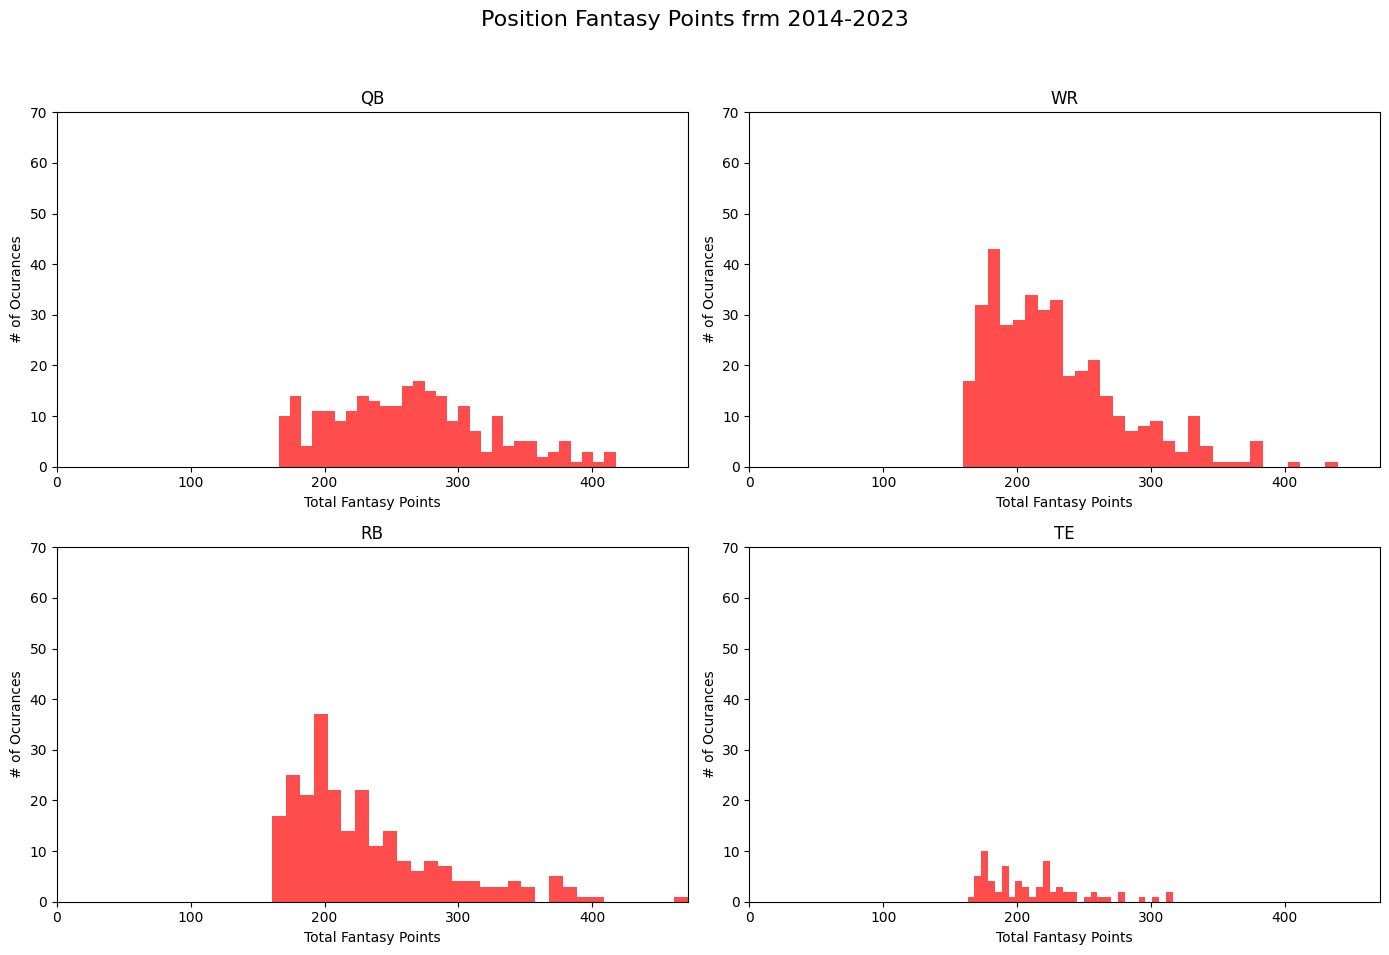

In [9]:
import matplotlib.pyplot as plt

df = multiple_year_df(2014, 2023)

# Picks only the wanted postitions
positions = ['QB', 'WR', 'RB', 'TE']
df_filtered = df[df['Position'].isin(positions)]

# Making subplots per positions
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Position Fantasy Points frm 2014-2023', fontsize=16)

# initializes the positions
position_order = {
    'QB': (0, 0),
    'WR': (0, 1),
    'RB': (1, 0),
    'TE': (1, 1)
}

# histograms for each postition
for pos in positions:
    graph = axs[position_order[pos]]
    graph.hist(df_filtered[df_filtered['Position'] == pos]['Total Fantasy Points'], bins=30, color='red', alpha=0.7)
    graph.set_title(pos)
    graph.set_xlim(0, df_filtered['Total Fantasy Points'].max())
    graph.set_ylim(0, 70)
    graph.set_xlabel('Total Fantasy Points')
    graph.set_ylabel('# of Ocurances')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Part 2.5 (20 points)

Another way to extend the data to access each QB's web page and extract their own data across different years. However, by extracting the table directly, we cannot access the herf link directly. Therefore we need to manully crawl the web page. Notice that we only extract the information for each QB instead of other players. In the end, you can re-create the figure in part 2.2. Here is a general approach for you to start with: (no need to write in functions)

1. get `soup` for the 2023 regular season leading board data (code provided)
2. Look for which class represents the player's corresponding webpage. You need to save two things here: `href_list` to save the information for each QB's webpage and `name_list` to save each QB's name. We can go through every line in the leading board data, if it is a QB, we save the herf and name, otherwise, just skip it. 
3. For each herf link in the `href_list`, extract the data on the page. Notice that there are mutiple tables in players'own webpage. We need the one with stats and FTPS. You may also want to remove the last row in the table since it is a summary data and add a column for the player's name. Merge (concat) all the data. You can rename the column and index. 
4. Re-create the plot in part 2.2. 

In [18]:
from bs4 import BeautifulSoup
url = 'https://fantasydata.com/nfl/fantasy-football-leaders?scope=season&scoring=fpts_ppr&order_by=fpts_ppr&sort_dir=desc&sp=2023_REG'
html_text = requests.get(url).text
soup = BeautifulSoup(html_text)
herf_list = []
name_list = []
player_data = []

# Finding quarterback player profiles
for player in soup.find_all('a', class_='player-link'):
    if player.find_next('td', class_='player-position').text == 'QB':
        herf_list.append(player['href'])
        name_list.append(player.text)

# Gets the stats for the QBs
for name, href in zip(name_list, herf_list):
    player_url = f'https://fantasydata.com{href}'
    player_html_text = requests.get(player_url).text
    player_soup = BeautifulSoup(player_html_text, 'html.parser')
    
    # Finding the players stats
    stats_table = player_soup.find('table')
    if stats_table:
        df = pd.read_html(str(stats_table))[0].iloc[:-1]
        df['Player'] = name
        player_data.append(df)

# Combines all the players Dataframe into one collective Dataframe
all_data = pd.concat(player_data, ignore_index=True) if player_data else pd.DataFrame()

In [22]:
expected_columns = ['Year', 'Team', 'Games Played', 'Passing Completions', 'Passing Attempts', 
                    'Completion %', 'Passing Yards', 'Passing TDs', 'Passing INTs', 
                    'Rushing Attempts', 'Rushing Yards', 'Rushing TDs', 'Total Fantasy Points', 'Player']

# Rename columns if necessary
if len(all_data.columns) == len(expected_columns):
    all_data.columns = expected_columns
    
df_qb = all_data[all_data['Year'] == '2023']

# Making Scatterplot
graph = px.scatter(df_qb, x='Passing Yards', y='Total Fantasy Points', color='Passing TDs', 
                   hover_data=['Player', 'Team'])

graph.update_layout(
    title='Passing Yards vs. Fantasy Points (QB)',
    xaxis_title='Passing Yards',
    yaxis_title='Total Fantasy Points'
)

graph.show()

KeyError: 'Year'